# Indicator Demonstration Notebook

A notebook to demonstrate some of the features of the Indicator class

Authors: gavin.treseder@essentialenergy.com.au; greg.bell@essentialenergy.com.au

Indicators represent the anything that can be monitored that will provide advanced warning that an asset wil lfail

In [1]:
# Add root folder to ptyhon path
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

# Standard packages
import numpy as np
import scipy.stats as ss
from matplotlib import pyplot as plt

# Class packages
from pof.condition import Condition

from pof.indicator import ConditionIndicator

The ConditionIndicator is a type of indiactor to represent condition loss over time. It can be initilaised with several different condition profiles

### Profile
The profile represents the condition profile that would be observed for an asset from perfect condition to failure based on a given pf_interval. Consider a linear condition profile that could take either 10 or 20 life units to fail

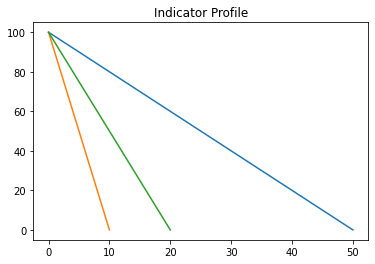

In [2]:
linear = ConditionIndicator(pf_curve='linear', pf_interval=50)
linear._set_profile()
linear._set_profile(pf_interval=10, name='cause_1')
linear._set_profile(pf_interval=20, name='cause_2')
linear.plot_profile()

## Timeline
To get a timeline of future condition we must consider any condition loss that has been accumulated already. Consider two different causes which have contributed 10 and 20 units of condition loss respectively 

In [3]:
linear._set_accumulated(10, 'cause_1')
linear._set_accumulated(20, 'cause_2')

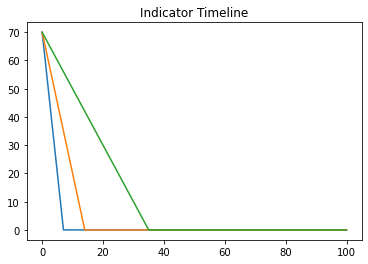

In [5]:
linear.sim_timeline(100, pf_interval=10, name='cause_1')
linear.sim_timeline(100, pf_interval=20, name='cause_2')
linear.sim_timeline(100)
linear.plot_timeline()

In [6]:
%%timeit
linear.sim_timeline(100, pf_interval=20, name='cause_2')

74.1 µs ± 19.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%%timeit
linear.sim_timeline(100)

59.3 µs ± 7.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Introducing Variance

The pf_std parameter can be used to introduce variance so the condition profile does not always follow the same condition profile. This is useful when the differentiators that affect the pf_interval are not fully understood.

In [8]:
linear = ConditionIndicator(pf_curve = 'linear', pf_interval = 20, pf_std=2)

linear.mc_timeline()
linear.plot_timelines(n=10)

AttributeError: 'ConditionIndicator' object has no attribute 'mc_timeline'

In [ ]:
linear = ConditionIndicator(pf_curve = 'linear')
linear.sim_timeline()
linear.plot_timeline()

In [5]:
linear

Condition process
- Calculate the profile
    - Check if hte condition profile is already created
    - add condition onto the front or end

- sim_timline
    - remove the 

In [7]:
c2=Condition(100, 0, "linear", [-5], pf_interval=10, pf_std = 2)

In [8]:
%timeit c2.set_condition_profile()

208 µs ± 46.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


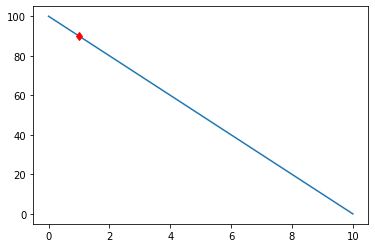

In [9]:
c.sim(1)
c.plot_condition_profile()

In [10]:
cond_profile = dict()

In [11]:
def _set_condition_profile(perfect = 100, failed = 0, pf_interval=20, name=None, pf_curve = 'linear'):
    
    x = np.linspace(0, pf_interval, pf_interval + 1)

    if pf_curve == 'linear':
        m = (failed - perfect) / pf_interval
        b = perfect
        y = m*x + b
    
    elif pf_curve == 'step':
        NotImplemented

    cond_profile[name] = y #TODO overloaded
    
    return y

In [12]:
%%timeit

_set_condition_profile()

52 µs ± 4.57 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
t_start = 0
t_stop = None
t_delay = 0

if t_stop == None:
    t_stop = self.pf_interval

if t_start > t_stop:
    t_start = t_stop

if t_stop < 0:
    t_start = t_start - t_stop
    t_stop = 0

NameError: name 'self' is not defined

In [14]:
perfect = 100
failed = 0
accumulated = dict()
pf_interval = dict( #TODO overloaded
    all = 20
)

In [15]:
def _get_accumulation(name=None):
    if name is None:
        return sum(accumulated.values())
        


In [16]:
cp = self.condition_profile[
    np.arange(
        max(self.t_condition, min(t_start, self.t_max)),
        min(t_stop + self.t_condition, self.t_max) + 1,
        1,
    )
]

# Fill the start with the current condtiion
if t_start < 0:
    cp = np.append(np.full(t_start * -1, self.condition), cp)

# Fill the end with the failed condition
n_after_failure = t_stop - t_start - len(cp) + 1
if n_after_failure > 0:
    cp = np.append(cp, np.full(max(0, n_after_failure), self.failed))

NameError: name 'self' is not defined

In [17]:
%%timeit


def get_condition_timeline(t_start = 0, t_stop = None, t_delay=0, name='condition')

# Get the condition profile
cp = _get_condition_profile() - _get_accumulation(name=name)

# Subtract accumulated time TODO
cp




SyntaxError: invalid syntax (<unknown>, line 1)

In [18]:
%%timeit
c.set_condition_profile()

217 µs ± 38.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%%timeit

c.get_condition_profile(2, 8)

5.98 µs ± 243 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [20]:
"""
    t_start
        When to start the tasks

    t_interval
        How often to repeat the tasks

    t_task
        The current time for this tasks schedule
    
    t_end
        When to stop the schedule

"""


t_start = 3
t_end = 20

t_task = 1
t_interval = 5

n_tiles = int((t_end - t_start) / t_interval)

tile_first = np.linspace(t_start)

tile_middle = 0

tile_last = 0

np.tile(np.linspace(t_interval, 1, t_interval), n_tiles)

int((t_end - t_start) / t_interval)

tile = np.concatenate(tile_first, tile_middle, tile_last)

TypeError: _linspace_dispatcher() missing 1 required positional argument: 'stop'

In [21]:
get_condition_timeline
    """
    returns the condition timeline
    """





IndentationError: unexpected indent (<ipython-input-21-8b4e07be3e24>, line 2)

In [22]:
from pof.indicator import PoleSafetyFactor

In [23]:
pi = PoleSafetyFactor(c, failed=10)

In [24]:
pi.__dict__

{'name': 'indicator',
 'component': <pof.condition.Condition at 0x26dcc46e400>,
 'decreasing': True,
 'threshold_failure': 10}